In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

Doing the analysis on Jupyter because using matplotlib and seaborn doesn't work as well on Arcpy.

# **Data Prep**

In [2]:
file = r'C:\Users\nicks\OneDrive\Desktop\emissionsdatasets\Methane_final.csv'

df = pd.read_csv(file)
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022,Not available


In [3]:
#Drop notes column

df = df.drop(['notes'], axis=1)
df = df.drop(df.columns[0], axis=1)
df

,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1427,Middle East,Yemen,1.538963,Energy,Other from oil and gas,All,2022
1428,Middle East,Yemen,3.400000,Energy,Satellite-detected large oil and gas emissions,All,2022
1429,Middle East,Yemen,145.181610,Energy,Total,All,2022
1430,Middle East,Yemen,0.534285,Other,Total,All,2019-2021


In [4]:
country = df['country']
for x,y in enumerate(country):
    if y == "Democratic Republic of Congo":
        country[x] = "DR Congo"
    if y == "Cote d'Ivoire":
        country[x] = "Ivory Coast"
    if y == "Korea":
        df = df.drop([x])
        
df

<ipython-input-4-cb9b3bb6dbcb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country[x] = "Ivory Coast"
<ipython-input-4-cb9b3bb6dbcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country[x] = "DR Congo"


,region,country,emissions,type,segment,reason,baseYear
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022
...,...,...,...,...,...,...,...
1427,Middle East,Yemen,1.538963,Energy,Other from oil and gas,All,2022
1428,Middle East,Yemen,3.400000,Energy,Satellite-detected large oil and gas emissions,All,2022
1429,Middle East,Yemen,145.181610,Energy,Total,All,2022
1430,Middle East,Yemen,0.534285,Other,Total,All,2019-2021


In [5]:
pops = r"C:\Users\nicks\OneDrive\Desktop\emissionsdatasets\Populations.csv"
popdf = pd.read_csv(pops)
popdf = popdf.rename(str.lower, axis='columns')
oil = r"C:\Users\nicks\OneDrive\Desktop\emissionsdatasets\List_of_countries_by_oil_production_1.csv"
oildf = pd.read_csv(oil)
oildf = oildf.rename(str.lower, axis = 'columns')
gas = r"C:\Users\nicks\OneDrive\Desktop\emissionsdatasets\betterntg.csv"
gasdf = pd.read_csv(gas)
gasdf = gasdf.rename(str.lower, axis = 'columns')
gasdf

,country,ntg
0,United States,34517.797540
1,Russia,24774.840260
2,Iran,8767.058842
3,China,7485.592649
4,Canada,6434.853880
...,...,...
685,NaN,NaN
686,NaN,NaN
687,NaN,NaN
688,NaN,NaN


In [6]:
#Formatting country names to same name
oilcountry = oildf['country']
for x,country in enumerate(oilcountry):
    oilcountry[x] = oilcountry[x].replace(' (OPEC)', '')
    oilcountry[x] = oilcountry[x].replace('Democratic Republic of the Congo', 'DR Congo')
    oilcountry[x] = oilcountry[x].replace('Republic of the Congo', 'Congo')
    oilcountry[x] = oilcountry[x].replace('Timor-Leste', 'East Timor')
        

    
gascountry = gasdf['country']

for country in gascountry:
    print(type(country))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [7]:
gasdf = gasdf.dropna()

In [8]:
gasdf

,country,ntg
0,United States,34517.797540
1,Russia,24774.840260
2,Iran,8767.058842
3,China,7485.592649
4,Canada,6434.853880
...,...,...
93,Suriname,0.246029
94,Belgium,0.182764
95,Slovenia,0.162849
96,Greece,0.159309


In [9]:
#Formatting country names to same name
gascountry = gasdf['country']
for x, country in enumerate(gascountry):
    gascountry[x] = gascountry[x].replace('        ', '')
    gascountry[x] = gascountry[x].replace('Congo, Democratic Republic of the', 'DR Congo')
    gascountry[x] = gascountry[x].replace('Congo, Republic of the', 'Congo')
    gascountry[x] = gascountry[x].replace('Timor-Leste', 'East Timor')
for gas in gasdf['ntg']:
    print(type(gas))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<ipython-input-9-f15f7466da37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gascountry[x] = gascountry[x].replace('        ', '')
<ipython-input-9-f15f7466da37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gascountry[x] = gascountry[x].replace('Congo, Democratic Republic of the', 'DR Congo')
<ipython-input-9-f15f7466da37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gascountry[x] = gascountry[x].replace('Congo, Republic of 

In [10]:
#Combining all dfs
df = df.merge(popdf, how='left', on='country')
df = df.merge(oildf, how='left', on='country')
df = df.merge(gasdf, how='left', on='country')
df

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,"44,903,225","1,133,123","24,959",3606.954675
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,"44,903,225","1,133,123","24,959",3606.954675
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,"44,903,225","1,133,123","24,959",3606.954675
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,"44,903,225","1,133,123","24,959",3606.954675
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022,"44,903,225","1,133,123","24,959",3606.954675
...,...,...,...,...,...,...,...,...,...,...,...
1415,Middle East,Yemen,1.538963,Energy,Other from oil and gas,All,2022,"33,696,614","70,085","2,080",4.229427
1416,Middle East,Yemen,3.400000,Energy,Satellite-detected large oil and gas emissions,All,2022,"33,696,614","70,085","2,080",4.229427
1417,Middle East,Yemen,145.181610,Energy,Total,All,2022,"33,696,614","70,085","2,080",4.229427
1418,Middle East,Yemen,0.534285,Other,Total,All,2019-2021,"33,696,614","70,085","2,080",4.229427


In [11]:
#Convert 'numbers' to numbers readable by computer
import numpy as np
for x,y in enumerate(df['pop']):
    try:
        df['pop'][x] = int(str(df['pop'][x]).replace(',', ''))
        df['oil'][x] = int(str(df['oil'][x]).replace(',', ''))
        df['oilbblcapita'][x] = int(str(df['oilbblcapita'][x]).replace(',', ''))
        print(x)
    except:
        continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74

<ipython-input-11-28acbd27f638>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop'][x] = int(str(df['pop'][x]).replace(',', ''))
<ipython-input-11-28acbd27f638>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oil'][x] = int(str(df['oil'][x]).replace(',', ''))
<ipython-input-11-28acbd27f638>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oilbblcapita'][x] = int(str(df['oilbblcapita'][x]).replace(',', ''))



75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
126
127
128
129
130
131
132
133
134
135
136
137
138
139
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351


In [12]:
#Get every combination of type, reason, and segment
segment = df['segment']
typee = df['type']
reason = df['reason']
completesegment = []
for x,y in enumerate(segment):
    placeholder = segment[x] + ' ('+ reason[x] + ')' + ' (' + typee[x] + ')'
    print(placeholder)
    placeholder = placeholder.replace(" ", "").replace('(','_').replace(')','').replace('-','_')
    completesegment.append(placeholder)
    segment[x] = segment[x] + '_' + typee[x]
    segment[x] = segment[x].replace('-','_').replace(' ','')
    
df['completesegment'] = completesegment

Total (All) (Agriculture)
Bioenergy (All) (Energy)
Gas pipelines and LNG facilities (Fugitive) (Energy)
Gas pipelines and LNG facilities (Vented) (Energy)
Onshore gas (Fugitive) (Energy)
Onshore gas (Vented) (Energy)
Onshore oil (Flared) (Energy)
Onshore oil (Fugitive) (Energy)
Onshore oil (Vented) (Energy)
Other from coal (All) (Energy)
Other from oil and gas (All) (Energy)
Satellite-detected large oil and gas emissions (All) (Energy)
Total (All) (Energy)
Total (All) (Other)
Total (All) (Waste)
Total (All) (Agriculture)
Bioenergy (All) (Energy)
Gas pipelines and LNG facilities (Fugitive) (Energy)
Gas pipelines and LNG facilities (Vented) (Energy)
Offshore oil (Flared) (Energy)
Offshore oil (Fugitive) (Energy)
Offshore oil (Vented) (Energy)
Onshore gas (Fugitive) (Energy)
Onshore gas (Vented) (Energy)
Onshore oil (Flared) (Energy)
Onshore oil (Fugitive) (Energy)
Onshore oil (Vented) (Energy)
Other from oil and gas (All) (Energy)
Total (All) (Energy)
Total (All) (Other)
Total (All) (Was

<ipython-input-12-bf22a15e6b01>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment[x] = segment[x] + '_' + typee[x]
<ipython-input-12-bf22a15e6b01>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment[x] = segment[x].replace('-','_').replace(' ','')


Onshore oil (Flared) (Energy)
Onshore oil (Fugitive) (Energy)
Onshore oil (Vented) (Energy)
Other from coal (All) (Energy)
Other from oil and gas (All) (Energy)
Steam coal (All) (Energy)
Total (All) (Energy)
Total (All) (Other)
Total (All) (Waste)
Total (All) (Agriculture)
Total (All) (Other)
Total (All) (Waste)
Total (All) (Agriculture)
Onshore oil (Flared) (Energy)
Onshore oil (Fugitive) (Energy)
Onshore oil (Vented) (Energy)
Other from oil and gas (All) (Energy)
Total (All) (Energy)
Total (All) (Other)
Total (All) (Waste)
Total (All) (Agriculture)
Bioenergy (All) (Energy)
Coking coal (All) (Energy)
Gas pipelines and LNG facilities (Fugitive) (Energy)
Gas pipelines and LNG facilities (Vented) (Energy)
Offshore gas (Fugitive) (Energy)
Offshore gas (Vented) (Energy)
Offshore oil (Flared) (Energy)
Offshore oil (Fugitive) (Energy)
Offshore oil (Vented) (Energy)
Onshore gas (Fugitive) (Energy)
Onshore gas (Vented) (Energy)
Onshore oil (Flared) (Energy)
Onshore oil (Fugitive) (Energy)
Onsh

# **Analysis**

In [13]:
country = df['country']
for x,y in enumerate(country):
    if y == "World":
        df = df.drop([x])

## Largest Waste Emitters

In [14]:
dfwa = df[df['segment'] == 'Total_Waste']
dfwa = dfwa.sort_values(by='emissions', ascending=False)

In [15]:
walargest = dfwa.nlargest(20,['emissions'])
walargest

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
251,Asia Pacific,China,10424.141600,Waste,Total_Waste,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Waste
525,Asia Pacific,India,5551.760742,Waste,Total_Waste,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Waste
1332,North America,United States,5117.928223,Waste,Total_Waste,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Waste
546,Asia Pacific,Indonesia,4568.938477,Waste,Total_Waste,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Waste
1044,Russia & Caspian,Russia,3931.244385,Waste,Total_Waste,All,2019-2021,144713314,10111830,69689,24774.840260,Total_All_Waste
168,Central and South America,Brazil,3800.057129,Waste,Total_Waste,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Waste
754,North America,Mexico,1994.627441,Waste,Total_Waste,All,2019-2021,127504126,1734495,13494,843.992271,Total_All_Waste
1310,Europe,United Kingdom,1113.141235,Waste,Total_Waste,All,2019-2021,67508936,810531,12083,1147.112074,Total_All_Waste
1063,Middle East,Saudi Arabia,955.779541,Waste,Total_Waste,All,2019-2021,36408820,9313145,265991,4081.529088,Total_All_Waste
376,Africa,Egypt,947.934082,Waste,Total_Waste,All,2019-2021,110990103,560942,5387,2451.881392,Total_All_Waste


In [16]:
df2 = dfwa[:10].copy()

In [17]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [dfwa['emissions'][10:].sum()]
})

In [18]:
df2 = pd.concat([df2, new_row])
df2

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
251,Asia Pacific,China,10424.141600,Waste,Total_Waste,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Waste
525,Asia Pacific,India,5551.760742,Waste,Total_Waste,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Waste
1332,North America,United States,5117.928223,Waste,Total_Waste,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Waste
546,Asia Pacific,Indonesia,4568.938477,Waste,Total_Waste,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Waste
1044,Russia & Caspian,Russia,3931.244385,Waste,Total_Waste,All,2019-2021,144713314,10111830,69689,24774.840260,Total_All_Waste
168,Central and South America,Brazil,3800.057129,Waste,Total_Waste,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Waste
754,North America,Mexico,1994.627441,Waste,Total_Waste,All,2019-2021,127504126,1734495,13494,843.992271,Total_All_Waste
1310,Europe,United Kingdom,1113.141235,Waste,Total_Waste,All,2019-2021,67508936,810531,12083,1147.112074,Total_All_Waste
1063,Middle East,Saudi Arabia,955.779541,Waste,Total_Waste,All,2019-2021,36408820,9313145,265991,4081.529088,Total_All_Waste
376,Africa,Egypt,947.934082,Waste,Total_Waste,All,2019-2021,110990103,560942,5387,2451.881392,Total_All_Waste


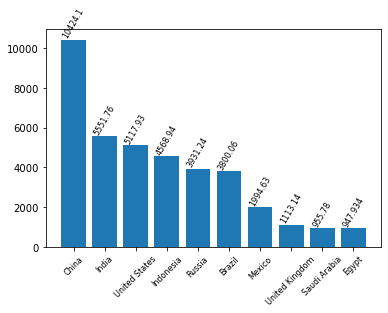

In [19]:
encountry = df2['country'][:10]
enemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(encountry, enemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

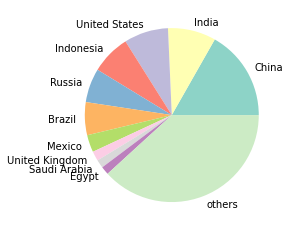

In [20]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

More populous countries emit more waste, unsurprising. However Saudi Arabia seems to emit quite a bit more waste per capita, interesting.

In [21]:
dfot = df[df['segment'] == 'Total_Other']
dfot = dfot.sort_values(by='emissions', ascending=False)

In [22]:
otlargest = dfot.nlargest(20,['emissions'])
otlargest

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
250,Asia Pacific,China,1377.870972,Other,Total_Other,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Other
1169,Africa,Tanzania,1225.095337,Other,Total_Other,All,2019-2021,65497748,NaN,NaN,46.545346,Total_All_Other
545,Asia Pacific,Indonesia,1156.447632,Other,Total_Other,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Other
524,Asia Pacific,India,571.256714,Other,Total_Other,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Other
1331,North America,United States,538.362610,Other,Total_Other,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Other
167,Central and South America,Brazil,387.701386,Other,Total_Other,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Other
869,Africa,Nigeria,347.128784,Other,Total_Other,All,2019-2021,218541212,1540991,7051,1567.548432,Total_All_Other
1043,Russia & Caspian,Russia,323.421631,Other,Total_Other,All,2019-2021,144713314,10111830,69689,24774.840260,Total_All_Other
71,Asia Pacific,Australia,241.804153,Other,Total_Other,All,2019-2021,26177414,334448,12860,5195.574816,Total_All_Other
327,Africa,DR Congo,201.834671,Other,Total_Other,All,2019-2021,99010212,22000,222,NaN,Total_All_Other


In [23]:
df2 = dfot[:10].copy()

## Largest Other Emitters

In [24]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [dfot['emissions'][10:].sum()]
})

In [25]:
df2 = pd.concat([df2, new_row])
df2

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
250,Asia Pacific,China,1377.870972,Other,Total_Other,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Other
1169,Africa,Tanzania,1225.095337,Other,Total_Other,All,2019-2021,65497748,NaN,NaN,46.545346,Total_All_Other
545,Asia Pacific,Indonesia,1156.447632,Other,Total_Other,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Other
524,Asia Pacific,India,571.256714,Other,Total_Other,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Other
1331,North America,United States,538.362610,Other,Total_Other,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Other
167,Central and South America,Brazil,387.701386,Other,Total_Other,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Other
869,Africa,Nigeria,347.128784,Other,Total_Other,All,2019-2021,218541212,1540991,7051,1567.548432,Total_All_Other
1043,Russia & Caspian,Russia,323.421631,Other,Total_Other,All,2019-2021,144713314,10111830,69689,24774.840260,Total_All_Other
71,Asia Pacific,Australia,241.804153,Other,Total_Other,All,2019-2021,26177414,334448,12860,5195.574816,Total_All_Other
327,Africa,DR Congo,201.834671,Other,Total_Other,All,2019-2021,99010212,22000,222,NaN,Total_All_Other


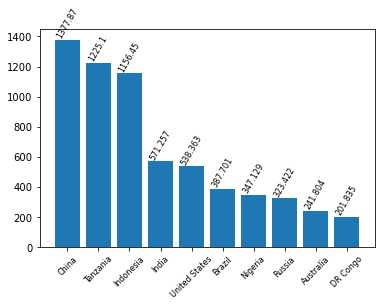

In [26]:
encountry = df2['country'][:10]
enemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(encountry, enemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

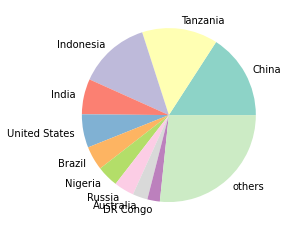

In [27]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

## Largest Energy Emitters

In [28]:
dfen = df[df['segment'] == 'Total_Energy']
dfen = dfen.sort_values(by='emissions', ascending=False)

In [29]:
enlargest = dfen.nlargest(20,['emissions'])
enlargest

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
249,Asia Pacific,China,25372.222660,Energy,Total_Energy,All,2022,1425887337,3987677,2823,7485.592649,Total_All_Energy
1042,Russia & Caspian,Russia,18078.083980,Energy,Total_Energy,All,2022,144713314,10111830,69689,24774.840260,Total_All_Energy
1330,North America,United States,16769.630860,Energy,Total_Energy,All,2022,338289857,11184870,33556,34517.797540,Total_All_Energy
566,Middle East,Iran,5629.822266,Energy,Total_Energy,All,2022,88550570,2546336,29617,8767.058842,Total_All_Energy
523,Asia Pacific,India,5185.236328,Energy,Total_Energy,All,2022,1417173173,602336,438,1140.348837,Total_All_Energy
544,Asia Pacific,Indonesia,5080.369141,Energy,Total_Energy,All,2022,275501339,658820,2389,2081.856340,Total_All_Energy
1250,Russia & Caspian,Turkmenistan,4740.041016,Energy,Total_Energy,All,2022,6430771,185891,28905,3072.619607,Total_All_Energy
868,Africa,Nigeria,3306.071289,Energy,Total_Energy,All,2022,218541212,1540991,7051,1567.548432,Total_All_Energy
1061,Middle East,Saudi Arabia,3051.096680,Energy,Total_Energy,All,2022,36408820,9313145,265991,4081.529088,Total_All_Energy
662,Russia & Caspian,Kazakhstan,2740.561279,Energy,Total_Energy,All,2022,19397998,1764463,91149,705.712004,Total_All_Energy


In [30]:
df2 = dfen[:10].copy()

In [31]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [dfen['emissions'][10:].sum()]
})

In [32]:
df2 = pd.concat([df2, new_row])
df2

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
249,Asia Pacific,China,25372.222660,Energy,Total_Energy,All,2022,1425887337,3987677,2823,7485.592649,Total_All_Energy
1042,Russia & Caspian,Russia,18078.083980,Energy,Total_Energy,All,2022,144713314,10111830,69689,24774.840260,Total_All_Energy
1330,North America,United States,16769.630860,Energy,Total_Energy,All,2022,338289857,11184870,33556,34517.797540,Total_All_Energy
566,Middle East,Iran,5629.822266,Energy,Total_Energy,All,2022,88550570,2546336,29617,8767.058842,Total_All_Energy
523,Asia Pacific,India,5185.236328,Energy,Total_Energy,All,2022,1417173173,602336,438,1140.348837,Total_All_Energy
544,Asia Pacific,Indonesia,5080.369141,Energy,Total_Energy,All,2022,275501339,658820,2389,2081.856340,Total_All_Energy
1250,Russia & Caspian,Turkmenistan,4740.041016,Energy,Total_Energy,All,2022,6430771,185891,28905,3072.619607,Total_All_Energy
868,Africa,Nigeria,3306.071289,Energy,Total_Energy,All,2022,218541212,1540991,7051,1567.548432,Total_All_Energy
1061,Middle East,Saudi Arabia,3051.096680,Energy,Total_Energy,All,2022,36408820,9313145,265991,4081.529088,Total_All_Energy
662,Russia & Caspian,Kazakhstan,2740.561279,Energy,Total_Energy,All,2022,19397998,1764463,91149,705.712004,Total_All_Energy


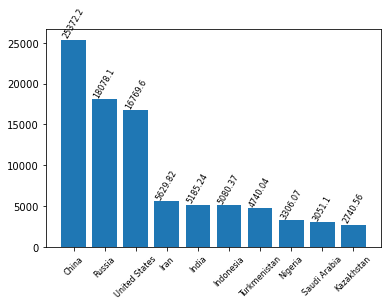

In [33]:
encountry = df2['country'][:10]
enemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(encountry, enemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

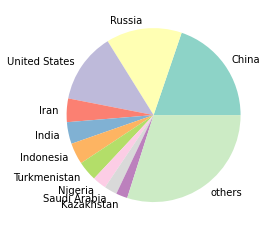

In [34]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

All countries in this pie have sizable energy production, such as oil, gas, or coal. Population isn't that strongly relevant as a matter of fact.

## Largest Agricultural Emitters

In [35]:
dfag = df[df['segment'] == 'Total_Agriculture']
dfag = dfag.sort_values(by='emissions', ascending=False)

In [36]:
aglargest = dfag.nlargest(20,['emissions'])
aglargest

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
231,Asia Pacific,China,18501.914060,Agriculture,Total_Agriculture,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Agriculture
504,Asia Pacific,India,18358.517580,Agriculture,Total_Agriculture,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Agriculture
149,Central and South America,Brazil,14020.088870,Agriculture,Total_Agriculture,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Agriculture
1311,North America,United States,9409.325195,Agriculture,Total_Agriculture,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Agriculture
907,Asia Pacific,Pakistan,5319.456055,Agriculture,Total_Agriculture,All,2019-2021,235824863,82514,350,1178.965803,Total_All_Agriculture
526,Asia Pacific,Indonesia,3518.344482,Agriculture,Total_Agriculture,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Agriculture
31,Central and South America,Argentina,3152.932617,Agriculture,Total_Agriculture,All,2019-2021,45510318,507337,10720,1427.612042,Total_All_Agriculture
51,Asia Pacific,Australia,2450.463135,Agriculture,Total_Agriculture,All,2019-2021,26177414,334448,12860,5195.574816,Total_All_Agriculture
734,North America,Mexico,2420.791016,Agriculture,Total_Agriculture,All,2019-2021,127504126,1734495,13494,843.992271,Total_All_Agriculture
103,Asia Pacific,Bangladesh,2410.234375,Agriculture,Total_Agriculture,All,2019-2021,171186373,3000,18,844.532398,Total_All_Agriculture


In [37]:
df2 = dfag[:10].copy()

In [38]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [dfag['emissions'][10:].sum()]
})

In [39]:
df2 = pd.concat([df2, new_row])
df2

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
231,Asia Pacific,China,18501.914060,Agriculture,Total_Agriculture,All,2019-2021,1425887337,3987677,2823,7485.592649,Total_All_Agriculture
504,Asia Pacific,India,18358.517580,Agriculture,Total_Agriculture,All,2019-2021,1417173173,602336,438,1140.348837,Total_All_Agriculture
149,Central and South America,Brazil,14020.088870,Agriculture,Total_Agriculture,All,2019-2021,215313498,2905121,13484,839.216923,Total_All_Agriculture
1311,North America,United States,9409.325195,Agriculture,Total_Agriculture,All,2019-2021,338289857,11184870,33556,34517.797540,Total_All_Agriculture
907,Asia Pacific,Pakistan,5319.456055,Agriculture,Total_Agriculture,All,2019-2021,235824863,82514,350,1178.965803,Total_All_Agriculture
526,Asia Pacific,Indonesia,3518.344482,Agriculture,Total_Agriculture,All,2019-2021,275501339,658820,2389,2081.856340,Total_All_Agriculture
31,Central and South America,Argentina,3152.932617,Agriculture,Total_Agriculture,All,2019-2021,45510318,507337,10720,1427.612042,Total_All_Agriculture
51,Asia Pacific,Australia,2450.463135,Agriculture,Total_Agriculture,All,2019-2021,26177414,334448,12860,5195.574816,Total_All_Agriculture
734,North America,Mexico,2420.791016,Agriculture,Total_Agriculture,All,2019-2021,127504126,1734495,13494,843.992271,Total_All_Agriculture
103,Asia Pacific,Bangladesh,2410.234375,Agriculture,Total_Agriculture,All,2019-2021,171186373,3000,18,844.532398,Total_All_Agriculture


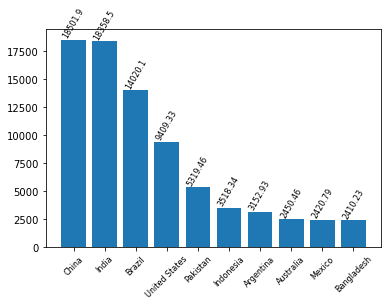

In [40]:
agcountry = df2['country'][:10]
agemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(agcountry, agemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

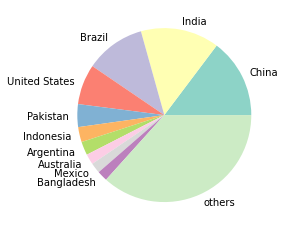

In [41]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

Most populated countries emit most from agriculture, unsurprising.

Interestingly Argentina is up there, alongside Australia, both of which are mid-pop-size countries, however it could be explained by their large beef productions, in which cows are reputed for their farts, which are loaded with methane.

## Largest Bio Emitters

Bioenergy falls into energy but I think it's worth looking into

In [42]:
dfbio = df[df['segment'] == 'Bioenergy_Energy']
dfbio = dfbio.sort_values(by='emissions', ascending=False)

In [43]:
biolargest = dfbio.nlargest(20,['emissions'])
biolargest

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
505,Asia Pacific,India,1378.843994,Energy,Bioenergy_Energy,All,2022,1417173173,602336,438,1140.348837,Bioenergy_All_Energy
853,Africa,Nigeria,1331.744019,Energy,Bioenergy_Energy,All,2022,218541212,1540991,7051,1567.548432,Bioenergy_All_Energy
232,Asia Pacific,China,984.200012,Energy,Bioenergy_Energy,All,2022,1425887337,3987677,2823,7485.592649,Bioenergy_All_Energy
411,Africa,Ethiopia,462.364014,Energy,Bioenergy_Energy,All,2022,123379925,NaN,NaN,NaN,Bioenergy_All_Energy
908,Asia Pacific,Pakistan,413.559998,Energy,Bioenergy_Energy,All,2022,235824863,82514,350,1178.965803,Bioenergy_All_Energy
150,Central and South America,Brazil,244.179993,Energy,Bioenergy_Energy,All,2022,215313498,2905121,13484,839.216923,Bioenergy_All_Energy
1312,North America,United States,237.843994,Energy,Bioenergy_Energy,All,2022,338289857,11184870,33556,34517.797540,Bioenergy_All_Energy
318,Africa,DR Congo,216.171997,Energy,Bioenergy_Energy,All,2022,99010212,22000,222,NaN,Bioenergy_All_Energy
1159,Africa,Tanzania,192.063995,Energy,Bioenergy_Energy,All,2022,65497748,NaN,NaN,46.545346,Bioenergy_All_Energy
527,Asia Pacific,Indonesia,185.175995,Energy,Bioenergy_Energy,All,2022,275501339,658820,2389,2081.856340,Bioenergy_All_Energy


In [44]:
df2 = dfbio[:10].copy()

In [45]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [dfbio['emissions'][10:].sum()]
})

In [46]:
df2 = pd.concat([df2, new_row])
df2

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
505,Asia Pacific,India,1378.843994,Energy,Bioenergy_Energy,All,2022,1417173173,602336,438,1140.348837,Bioenergy_All_Energy
853,Africa,Nigeria,1331.744019,Energy,Bioenergy_Energy,All,2022,218541212,1540991,7051,1567.548432,Bioenergy_All_Energy
232,Asia Pacific,China,984.200012,Energy,Bioenergy_Energy,All,2022,1425887337,3987677,2823,7485.592649,Bioenergy_All_Energy
411,Africa,Ethiopia,462.364014,Energy,Bioenergy_Energy,All,2022,123379925,NaN,NaN,NaN,Bioenergy_All_Energy
908,Asia Pacific,Pakistan,413.559998,Energy,Bioenergy_Energy,All,2022,235824863,82514,350,1178.965803,Bioenergy_All_Energy
150,Central and South America,Brazil,244.179993,Energy,Bioenergy_Energy,All,2022,215313498,2905121,13484,839.216923,Bioenergy_All_Energy
1312,North America,United States,237.843994,Energy,Bioenergy_Energy,All,2022,338289857,11184870,33556,34517.797540,Bioenergy_All_Energy
318,Africa,DR Congo,216.171997,Energy,Bioenergy_Energy,All,2022,99010212,22000,222,NaN,Bioenergy_All_Energy
1159,Africa,Tanzania,192.063995,Energy,Bioenergy_Energy,All,2022,65497748,NaN,NaN,46.545346,Bioenergy_All_Energy
527,Asia Pacific,Indonesia,185.175995,Energy,Bioenergy_Energy,All,2022,275501339,658820,2389,2081.856340,Bioenergy_All_Energy


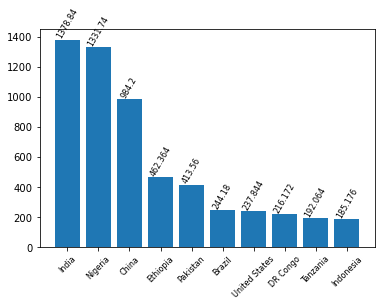

In [47]:
encountry = df2['country'][:10]
enemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(encountry, enemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

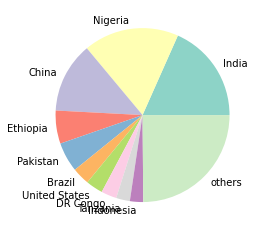

In [48]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

Bioenergy is used largely among developing countries, basically the opposite of my expectations.

It appears bioenergy includes the most simple form; burning wood, as opposed to more advertised concepts of biofuel such as corn and poop powered cars.

## Largest Total Emitters

In [49]:
typelist = ['Total_Agriculture', 'Total_Energy', 'Total_Waste', 'Total_Other']
df3 = df[df['segment'].isin(typelist)]
df3

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
0,Africa,Algeria,257.611206,Agriculture,Total_Agriculture,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Agriculture
12,Africa,Algeria,2669.194580,Energy,Total_Energy,All,2022,44903225,1133123,24959,3606.954675,Total_All_Energy
13,Africa,Algeria,6.475721,Other,Total_Other,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Other
14,Africa,Algeria,510.965607,Waste,Total_Waste,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Waste
15,Africa,Angola,400.969574,Agriculture,Total_Agriculture,All,2019-2021,35588987,1127449,34076,206.875242,Total_All_Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Asia Pacific,Vietnam,783.775024,Waste,Total_Waste,All,2019-2021,98186856,182146,1849,247.591362,Total_All_Waste
1405,Middle East,Yemen,181.292984,Agriculture,Total_Agriculture,All,2019-2021,33696614,70085,2080,4.229427,Total_All_Agriculture
1417,Middle East,Yemen,145.181610,Energy,Total_Energy,All,2022,33696614,70085,2080,4.229427,Total_All_Energy
1418,Middle East,Yemen,0.534285,Other,Total_Other,All,2019-2021,33696614,70085,2080,4.229427,Total_All_Other


In [50]:
totals=df3.groupby('country')[['emissions','segment']].sum().reset_index()
totals = totals.sort_values(by='emissions', ascending=False)

In [51]:
dftot = totals.sort_values(by='emissions', ascending=False)
dftot

,country,emissions
16,China,55676.149292
91,United States,31835.246888
36,India,29666.771364
70,Russia,24354.845943
10,Brazil,19964.342745
...,...,...
75,Slovenia,75.660512
11,Brunei,54.243037
30,Gambia,47.587691
49,Liberia,43.897755


In [52]:
totlargest = dftot.nlargest(20,['emissions'])
totlargest

,country,emissions
16,China,55676.149292
91,United States,31835.246888
36,India,29666.771364
70,Russia,24354.845943
10,Brazil,19964.342745
37,Indonesia,14324.099732
38,Iran,7400.863175
63,Pakistan,7250.228211
60,Nigeria,6597.824401
52,Mexico,6051.109085


In [53]:
df2 = totals[:10].copy()

In [54]:
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'emissions' : [totals['emissions'][10:].sum()]
})

In [55]:
df2 = pd.concat([df2, new_row])
df2

,country,emissions
16,China,55676.149292
91,United States,31835.246888
36,India,29666.771364
70,Russia,24354.845943
10,Brazil,19964.342745
37,Indonesia,14324.099732
38,Iran,7400.863175
63,Pakistan,7250.228211
60,Nigeria,6597.824401
52,Mexico,6051.109085


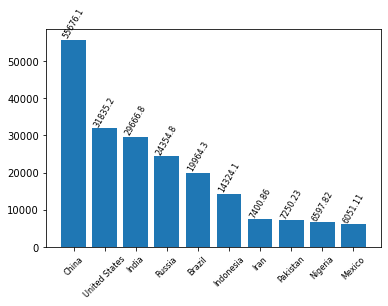

In [56]:
agcountry = df2['country'][:10]
agemissions = df2['emissions'][:10]

fig, ax = plt.subplots()
bar_container = ax.bar(agcountry, agemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

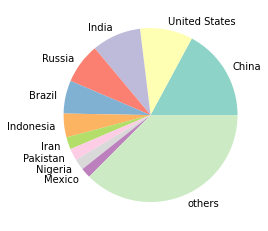

In [57]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(df2['emissions'], labels = df2['country'], colors = cs)
plt.show()

Largest emitters are countries with larger population. More people, more energy, more emissions, who knew?

## Largest Emission by Type

In [58]:
typelist = ['Total_Agriculture', 'Total_Energy', 'Total_Waste', 'Total_Other']
df3 = df[df['segment'].isin(typelist)]
df3

,region,country,emissions,type,segment,reason,baseYear,pop,oil,oilbblcapita,ntg,completesegment
0,Africa,Algeria,257.611206,Agriculture,Total_Agriculture,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Agriculture
12,Africa,Algeria,2669.194580,Energy,Total_Energy,All,2022,44903225,1133123,24959,3606.954675,Total_All_Energy
13,Africa,Algeria,6.475721,Other,Total_Other,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Other
14,Africa,Algeria,510.965607,Waste,Total_Waste,All,2019-2021,44903225,1133123,24959,3606.954675,Total_All_Waste
15,Africa,Angola,400.969574,Agriculture,Total_Agriculture,All,2019-2021,35588987,1127449,34076,206.875242,Total_All_Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Asia Pacific,Vietnam,783.775024,Waste,Total_Waste,All,2019-2021,98186856,182146,1849,247.591362,Total_All_Waste
1405,Middle East,Yemen,181.292984,Agriculture,Total_Agriculture,All,2019-2021,33696614,70085,2080,4.229427,Total_All_Agriculture
1417,Middle East,Yemen,145.181610,Energy,Total_Energy,All,2022,33696614,70085,2080,4.229427,Total_All_Energy
1418,Middle East,Yemen,0.534285,Other,Total_Other,All,2019-2021,33696614,70085,2080,4.229427,Total_All_Other


In [59]:
totals=df3.groupby('segment')[['emissions','country']].sum().reset_index()
totals = totals.sort_values(by='emissions', ascending=False)
totals

,segment,emissions
1,Total_Energy,128333.820736
0,Total_Agriculture,125650.197537
3,Total_Waste,62158.240683
2,Total_Other,8685.953893


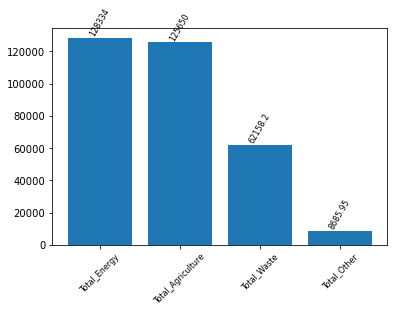

In [60]:
agcountry = totals['segment']
agemissions = totals['emissions']

fig, ax = plt.subplots()
bar_container = ax.bar(agcountry, agemissions)

ax.bar_label(bar_container,rotation = 60, fontsize = 8)

plt.xticks(rotation=45, fontsize = 8)

plt.show()

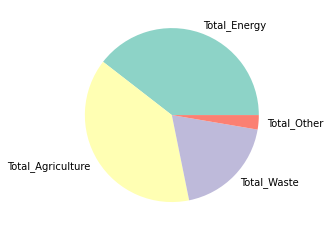

In [61]:
from matplotlib import cm

cs=cm.Set3(np.arange(11))
plt.pie(totals['emissions'], labels = totals['segment'], colors = cs)
plt.show()

Agriculture and energy emit an equivalent amount of methane, as opposed to my expectations, being energy dominates the pie chart.

Developing countries tend to have more business activity focused in the agriculture sector, and most of the world population is in developing countries.